In [1]:
###IMPORT REQUIRED PACKAGES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import colormaps as cmaps

FIGURE 2: Sample GA results

In [4]:
###READ IN DATA
ode = pd.read_csv('../old/data/plots/sample_ga_ode.csv')
fba = pd.read_csv('../old/data/plots/sample_ga_fba.csv')

In [29]:
### SAMPLE CURVE STATISTICS
#Compute time to 90% of steady state
ss = fba.lam[86400]
print(fba.loc[fba.lam < ss/0.9].index[0]/(60*60))
#Percent drop of lambda
100*(fba.lam[0] - fba.lam[86400])/fba.lam[0]

6.240277777777778


78.67931503656939

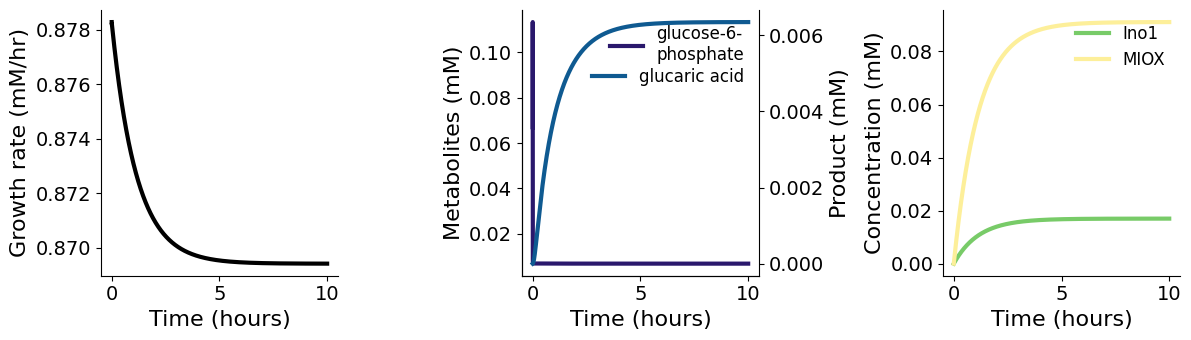

In [34]:

ode = pd.read_csv('F:/plots/sample_ga_ode_test.csv')
fba = pd.read_csv('F:/plots/sample_ga_fba_test.csv')
###FIGURE: Sample Bcar results
palette = cmaps.haline.discrete(5).colors

linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12
fig, axs = plt.subplots(1, 3, figsize=(12, 3.5))
#Growth rate 
ax = axs[0]
ax.plot(fba.time, fba.lam, lw=linewidth, color="black")
ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Growth rate (mM/hr)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)

#Precursors
ax = axs[1]
ax.plot(ode.time, ode.g6p, lw=linewidth, color=palette[0], label='glucose-6-\nphosphate')

ax2 = ax.twinx()
ax2.plot(ode.time, ode.mi, lw=linewidth, color=palette[1], label=r'glucaric acid')
ax2.set_ylabel('Product (mM)', fontsize=axislabelsize)

ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Metabolites (mM)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top']:
    ax.spines[axis].set_linewidth(0)
ax.legend(fontsize=legendsize, frameon=False, bbox_to_anchor=(1.0, 1.0))
ax2.tick_params(axis='y', labelsize=axistickssize)
for axis in ['top','right']:
    ax2.spines[axis].set_linewidth(0)
ax2.legend(fontsize=legendsize, frameon=False, bbox_to_anchor=(1.0, 0.84))
#Enzymes
ax = axs[2]
ax.plot(ode.time, ode.ino1, lw=linewidth, color=palette[3], label='Ino1')
ax.plot(ode.time, ode.miox, lw=linewidth, color=palette[4], label='MIOX')
ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Concentration (mM)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
ax.legend(fontsize=legendsize, loc='upper right', frameon=False)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)

fig.tight_layout()
fig.savefig("../figs/ga_samplesim_metabolites.png", dpi=300)

FIGURE 3: Medium conditions

In [8]:
##READ IN DATA
growth_conditions_names = ["galactose", "gluconate", "xylose", "lalanine", "lactate", "pyruvate", "ribose", "glucose", "fructose", "sorbitol", "mannitol", "na-glucosamine", "glycerol", "succinate", "acetate"]
wt = pd.DataFrame()
for g in growth_conditions_names:
    ode_data = pd.read_csv("F:/medium_conditions/"+g+"_ode_data.csv")
    fba_data = pd.read_csv("F:/medium_conditions/"+g+"_fba_data.csv")
    wt = pd.concat([wt, pd.DataFrame({"gc": [g], "p_auc": [np.sum(ode_data.mi)], "p_final": [list(ode_data.mi)[-1]], "lam_final": [list(fba_data.lam)[-1]]})])  

#Alternatively, read in directly from CSV
# wt = pd.read_csv('F:/plots/medium_cond_sum.csv')

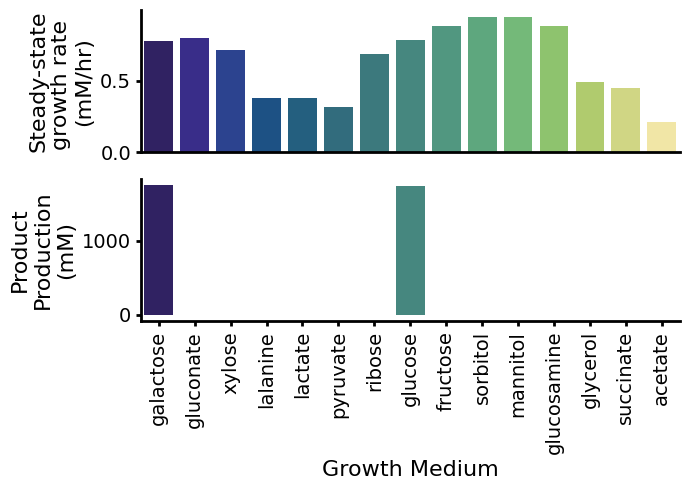

In [10]:
###FIGURE: Medium conditions growth rate and product production
###FIGURE: Growth conditions experiment
gcn = ["galactose", "gluconate", "xylose", "lalanine", "lactate", "pyruvate", "ribose", "glucose", "fructose", "sorbitol", "mannitol", "glucosamine", "glycerol", "succinate", "acetate"]

palette = cmaps.haline.discrete(15).colors
linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12

fig, axs = plt.subplots(2, 1,figsize=(7, 5), sharex=True)

#Growth rates
ax = axs[0]
sns.barplot(data=wt, x='gc', y='lam_final', palette=palette, ax=ax)
ax.set_ylabel('Steady-state\ngrowth rate \n(mM/hr)', fontsize=axislabelsize)
ax.set_xlabel('')
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(width=2)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.set_xlabel('')
ax.tick_params(axis='x', bottom=False)

#Product production
ax = axs[1]
sns.barplot(data=wt, x='gc', y='p_auc', palette=palette, ax=ax)
ax.set_ylabel('Product\nProduction\n(mM)', fontsize=axislabelsize)
ax.set_xlabel('Growth Medium', fontsize=16)
ax.set_xticklabels(gcn, fontsize=12, rotation=90)

for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(width=2)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
fig.tight_layout()
#fig.savefig('../figs/fig2c.png', dpi=500)

FIGURE 4: BayesOpt